In [1]:
import torch

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
x_train = np.array([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816], [8.9],
                  [5.2], [8.59], [2.1], [8.0], [10.0], [4.5], [6.0], [4.0]], dtype= np.float32)

y_train = np.array([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357], [2.6],
                  [1.96], [3.53], [1.76], [3.2], [3.5], [1.6], [2.5], [2.2]], dtype= np.float32)

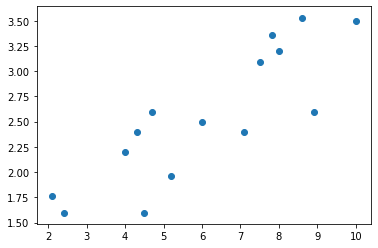

In [4]:
plt.scatter(x_train, y_train)

In [5]:
x = torch.from_numpy(x_train)
y =torch.from_numpy(y_train)


In [6]:
x.shape

torch.Size([15, 1])

In [7]:
y.shape

torch.Size([15, 1])

In [8]:
inp =1 
hid = 5
out =1

In [9]:
model = torch.nn.Sequential(
        torch.nn.Linear(inp, hid),
        torch.nn.ReLU(),
        torch.nn.Linear(hid, out))

In [10]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [12]:
learning_rate = 1e-4

for i in range(500):
    y_pred = model(x)
    loss  = loss_fn(y_pred, y)
    
    print(i, loss.item())
    
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 57.54603958129883
1 40.92783737182617
2 29.300289154052734
3 21.17972755432129
4 15.533121109008789
5 11.628641128540039
6 8.94485092163086
7 7.110846996307373
8 5.864284515380859
9 5.021027565002441
10 4.45289421081543
11 4.071365833282471
12 3.8157713413238525
13 3.64479660987854
14 3.5304718017578125
15 3.453956127166748
16 3.402608633041382
17 3.3679792881011963
18 3.344435214996338
19 3.3282313346862793
20 3.3168821334838867
21 3.3087399005889893
22 3.3027162551879883
23 3.2980904579162598
24 3.294386625289917
25 3.2912917137145996
26 3.2885982990264893
27 3.28617000579834
28 3.283916711807251
29 3.281780242919922
30 3.279721736907959
31 3.277712821960449
32 3.2757415771484375
33 3.2737925052642822
34 3.271859645843506
35 3.2699382305145264
36 3.268026113510132
37 3.2661194801330566
38 3.2642180919647217
39 3.2623202800750732
40 3.260427713394165
41 3.258535861968994
42 3.256648302078247
43 3.254763126373291
44 3.252880096435547
45 3.250999689102173
46 3.2491211891174316
47 3.24

In [13]:
predicted_in_tensors = model(x)

In [14]:
predicted_in_tensors

tensor([[2.0023],
        [1.2321],
        [2.9400],
        [2.8061],
        [1.8684],
        [3.0458],
        [3.4088],
        [2.1698],
        [3.3050],
        [1.1316],
        [3.1074],
        [3.7772],
        [1.9353],
        [2.4377],
        [1.7679]], grad_fn=<AddmmBackward>)

In [15]:
prediced = predicted_in_tensors.detach().numpy()

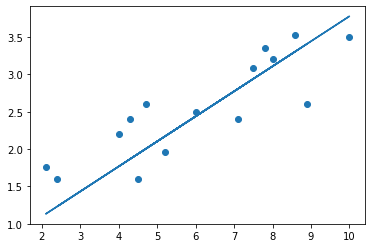

In [17]:
plt.scatter(x_train, y_train)
plt.plot(x_train, prediced)

In [18]:
# using Optimizer

In [19]:
model = torch.nn.Sequential(
        torch.nn.Linear(inp, hid),
        torch.nn.ReLU(),
        torch.nn.Linear(hid, out))

loss_fn = torch.nn.MSELoss(reduction='sum')

In [23]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
learning_rate = 1e-4
for i in range(100):
    y_pred = model(x)
    loss  = loss_fn(y_pred, y)
    print(i, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 474.25799560546875
1 321.2005310058594
2 229.89620971679688
3 169.78851318359375
4 127.70223236083984
5 97.05121612548828
6 74.17185974121094
7 56.845115661621094
8 43.6269645690918
9 33.51932144165039
10 25.798110961914062
11 19.91895294189453
12 15.462918281555176
13 12.103472709655762
14 9.584927558898926
15 7.707320690155029
16 6.315014839172363
17 5.287694931030273
18 4.5331130027771
19 3.9810876846313477
20 3.5786612033843994
21 3.2861738204956055
22 3.074113130569458
23 2.920659303665161
24 2.809767246246338
25 2.729689598083496
26 2.6718666553497314
27 2.6300792694091797
28 2.5998284816741943
29 2.5778586864471436
30 2.5618300437927246
31 2.5500564575195312
32 2.5413293838500977
33 2.5347788333892822
34 2.52978515625
35 2.5259032249450684
36 2.5228166580200195
37 2.5202972888946533
38 2.5181822776794434
39 2.516356945037842
40 2.5147390365600586
41 2.5132689476013184
42 2.511903762817383
43 2.510615587234497
44 2.5093817710876465
45 2.5081865787506104
46 2.507020950317383
47 

# Bike sharing dataset

In [24]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn

In [29]:
data = pd.read_csv("train.csv", index_col=0)

In [30]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [31]:
data.shape

(10886, 11)

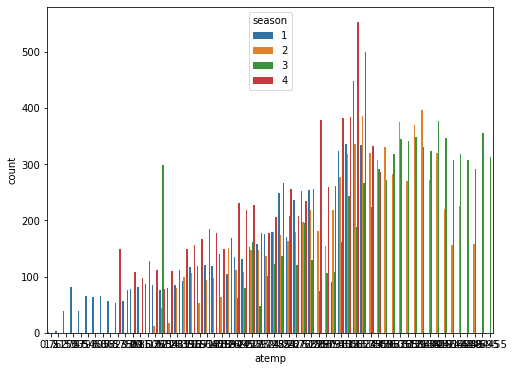

In [33]:
plt.figure(figsize=(8,6))

sns.barplot('atemp','count', hue = 'season', data =data, ci=None)


In [34]:
data.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [35]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [37]:
columns = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count']

In [42]:
features = data[columns] 

In [48]:
features


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [49]:
target = data[['count']]

In [50]:
target

,count
datetime,
2011-01-01 00:00:00,16
2011-01-01 01:00:00,40
2011-01-01 02:00:00,32
2011-01-01 03:00:00,13
2011-01-01 04:00:00,1
...,...
2012-12-19 19:00:00,336
2012-12-19 20:00:00,241
2012-12-19 21:00:00,168


In [51]:
from sklearn.model_selection import train_test_split

In [53]:
X_train ,x_test, Y_train, y_test= train_test_split(features, target, test_size =0.2)

In [54]:
#into tensos

X_train_tensor = torch.tensor(X_train.values, dtype = torch.float)
x_test_tensor = torch.tensor(x_test.values, dtype = torch.float)

Y_train_tensor = torch.tensor(Y_train.values, dtype = torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype = torch.float)

In [58]:
import torch.utils.data as data_utils

In [59]:
train_data = data_utils.TensorDataset(X_train_tensor, Y_train_tensor)

In [61]:
train_loader = data_utils.DataLoader(train_data, batch_size =100, shuffle= True)

In [62]:
len(train_loader)

88

In [63]:
feature_batch, target_batch = iter(train_loader).next()

In [65]:
feature_batch.shape

torch.Size([100, 11])

In [69]:
target_batch.shape
print(X_train.shape[1])

11


In [85]:
# model

inp = X_train.shape[1]
out = 1
hid = 10

loss_fn = torch.nn.MSELoss(reduction='sum')

In [86]:
model = torch.nn.Sequential(
        torch.nn.Linear(inp, hid),
        torch.nn.Linear(hid, out))

In [87]:
import hiddenlayer as hl

In [88]:
optimizer = torch.optim.Adam( model.parameters(), lr = 0.001)
print(len(train_loader))

88


In [89]:
total_step = len(train_loader)
num_epochs = 1000
for i in range(num_epochs +1):
    for i, (features, targets) in enumerate(train_loader):
        output = model(features)
        loss = loss_fn(output, target)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 20000 ==0 :
            print("Loss", loss)

TypeError: 'numpy.int64' object is not callable